In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Calculate correlation with fixed effect by demeaning over time

In [1]:
#load data
data = pd.read_csv('panel_mig.csv').set_index('state')

NameError: name 'pd' is not defined

In [369]:
#take means for every column
means = data.mean(axis=0)

In [370]:
means

year              2.002500e+03
code              1.650000e+01
nowa_lev          3.299191e-01
sea_lev           3.401235e-01
per_lev           4.692867e-01
seaper_lev        8.094101e-01
lag_nowa_lev      3.338734e-01
lag_sea_lev       3.397531e-01
lag_per_lev       4.714329e-01
lag_seaper_lev    8.111860e-01
precip_lev        9.016885e+02
lag_precip_lev    8.820466e+02
nowa_tre         -7.015434e-04
sea_tre          -1.370824e-05
per_tre           1.060708e-03
seaper_tre        1.046999e-03
lag_nowa_tre      4.200462e-03
lag_sea_tre      -3.171115e-03
lag_per_tre      -1.981627e-04
lag_seaper_tre   -3.369278e-03
precip_tre        9.101027e+00
lag_precip_tre    6.698884e+00
mig               0.000000e+00
mig_wt            7.387706e-01
pop               3.151156e+06
dtype: float64

In [371]:
data.head()

,year,code,nowa_lev,sea_lev,per_lev,seaper_lev,lag_nowa_lev,lag_sea_lev,lag_per_lev,lag_seaper_lev,...,seaper_tre,lag_nowa_tre,lag_sea_tre,lag_per_tre,lag_seaper_tre,precip_tre,lag_precip_tre,mig,mig_wt,pop
state,,,,,,,,,,,,,,,,,,,,,
AGUASCALIENTES,1990,1,0.033764,0.004554,0.012548,0.017102,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.002857,-14.870000,25160.0,3.496100,719659
AGUASCALIENTES,1995,1,0.022106,0.015783,0.015513,0.031296,0.023173,0.013927,0.015808,0.029734,...,0.003722,-0.003081,0.003227,0.001299,0.004527,-51.225714,-12.900000,33408.0,3.872404,862720
AGUASCALIENTES,2000,1,0.024106,0.019275,0.012000,0.031275,0.021931,0.020357,0.013092,0.033450,...,-0.003008,0.001394,-0.000092,-0.001305,-0.001397,-11.851429,-31.162857,21278.0,2.253345,944285
AGUASCALIENTES,2005,1,0.021484,0.019665,0.014149,0.033814,0.023043,0.019782,0.012474,0.032256,...,0.003097,-0.003242,0.001274,0.001909,0.003183,38.517143,77.220000,21560.0,2.023623,1065416
AGUASCALIENTES,2010,1,0.015298,0.022737,0.017349,0.040087,0.013789,0.023360,0.018192,0.041552,...,-0.000350,-0.001437,0.001859,-0.000382,0.001477,-20.768571,-31.774286,20168.0,1.701947,1184996


In [372]:
#Demean all entries (Remove time-invariant individual effect)
demean = copy.deepcopy(data)
for i in data.columns:
    demean[i] = data[i]-means.loc[i]
    
#Mean of net-migration is 0!!!

#Change the order of columns for later use
col = demean.columns.tolist()
newcol = col[:10]+col[12:20]+col[10:12]+col[20:]
demean = demean[newcol]
demean.head()

,year,code,nowa_lev,sea_lev,per_lev,seaper_lev,lag_nowa_lev,lag_sea_lev,lag_per_lev,lag_seaper_lev,...,lag_sea_tre,lag_per_tre,lag_seaper_tre,precip_lev,lag_precip_lev,precip_tre,lag_precip_tre,mig,mig_wt,pop
state,,,,,,,,,,,,,,,,,,,,,
AGUASCALIENTES,-12.5,-15.5,-0.296156,-0.335569,-0.456739,-0.792308,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-442.705122,-465.646649,18.901830,-21.568884,25160.0,2.757330,-2.431497e+06
AGUASCALIENTES,-7.5,-15.5,-0.307813,-0.324340,-0.453774,-0.778114,-0.310701,-0.325827,-0.455625,-0.781452,...,0.006398,0.001498,0.007896,-351.971788,-341.996649,-60.326741,-19.598884,33408.0,3.133633,-2.288436e+06
AGUASCALIENTES,-2.5,-15.5,-0.305813,-0.320849,-0.457287,-0.778136,-0.311942,-0.319396,-0.458340,-0.777736,...,0.003080,-0.001107,0.001972,-527.688455,-502.996649,-20.952455,-37.861741,21278.0,1.514575,-2.206871e+06
AGUASCALIENTES,2.5,-15.5,-0.308435,-0.320458,-0.455137,-0.775596,-0.310830,-0.319972,-0.458959,-0.778930,...,0.004445,0.002107,0.006552,-365.338455,-380.029983,29.416116,70.521116,21560.0,1.284852,-2.085740e+06
AGUASCALIENTES,7.5,-15.5,-0.314621,-0.317386,-0.451937,-0.769324,-0.320085,-0.316393,-0.453241,-0.769634,...,0.005030,-0.000183,0.004846,-349.771788,-293.763316,-29.869598,-38.473170,20168.0,0.963176,-1.966160e+06


In [373]:
def plotdemean(cols,axs,indep):
    for cl,axis in zip(cols,axs):
        cond = demean[cl].notna() #create a boolean to mask nan
        y = demean[indep][cond] #drop an element where cl is nan
        x = demean[cl].dropna()
        m,b = np.polyfit(x,y,1)
        axis.scatter(x,y,label='states(1990-2015)')
        axis.plot(x,m*x+b,color='r',label='OLS')
        axis.text(0.5, 0.85, 'r='+str(round(m,3)),fontsize=12, horizontalalignment='center',verticalalignment='center',transform=axis.transAxes)
        axis.set_title(cl+' and migration')

## Unweighted Migration and Unwighted Variables (GSW and Precipitation)

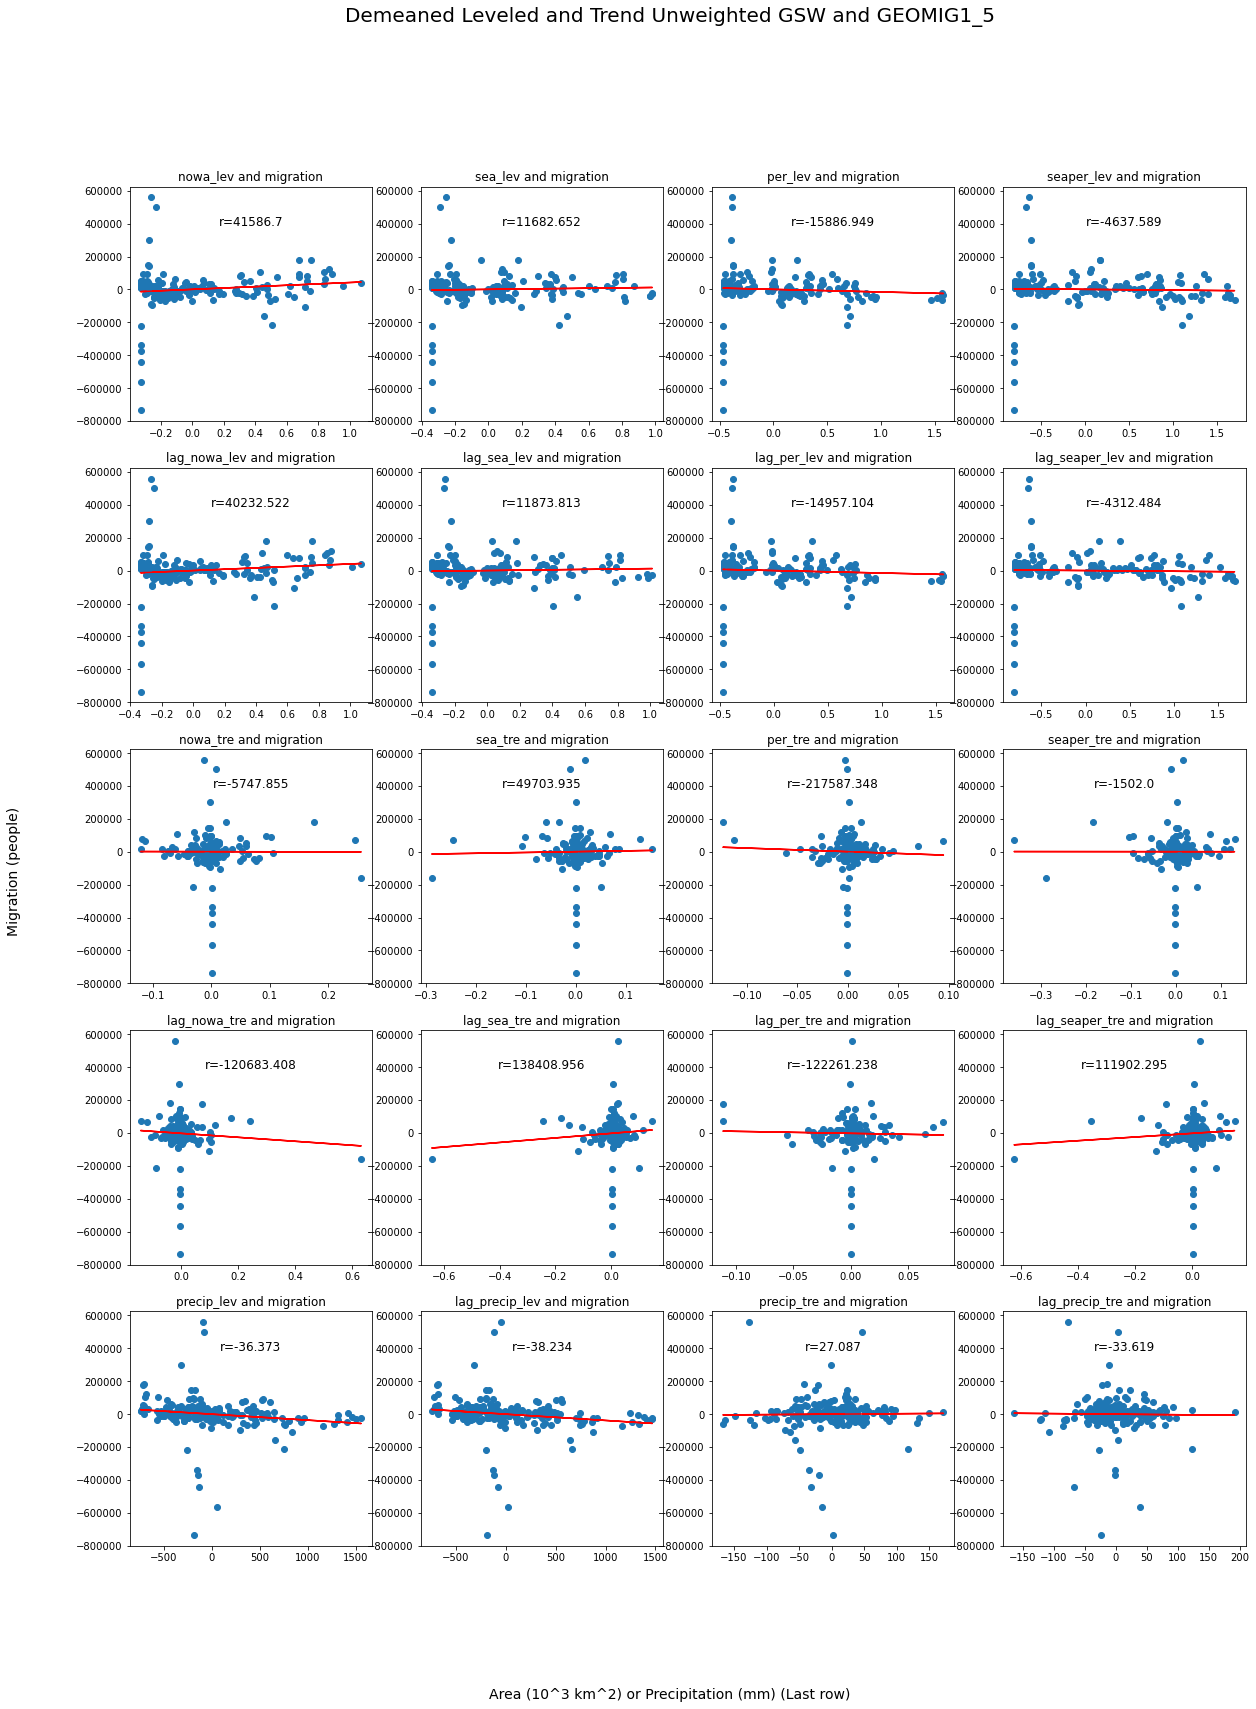

In [374]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5,4,figsize=(20,25))
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20]
plotdemean(demean.columns[2:22],axs,'mig')
plt.suptitle("Demeaned Leveled and Trend Unweighted GSW and GEOMIG1_5", fontsize=20)
fig.text(0.5, 0.04,'Area (10^3 km^2) or Precipitation (mm) (Last row)', ha='center',fontsize=14)
fig.text(0.04, 0.5,'Migration (people)', va='center', rotation='vertical',fontsize=14);



## Migration and Weighted Variables (Variable/Population)

In [375]:
#Weight all entries (Divide everything by population)
demean_wt = copy.deepcopy(demean)
for i in demean.columns:
    demean_wt[i] = demean[i]/demean['pop']

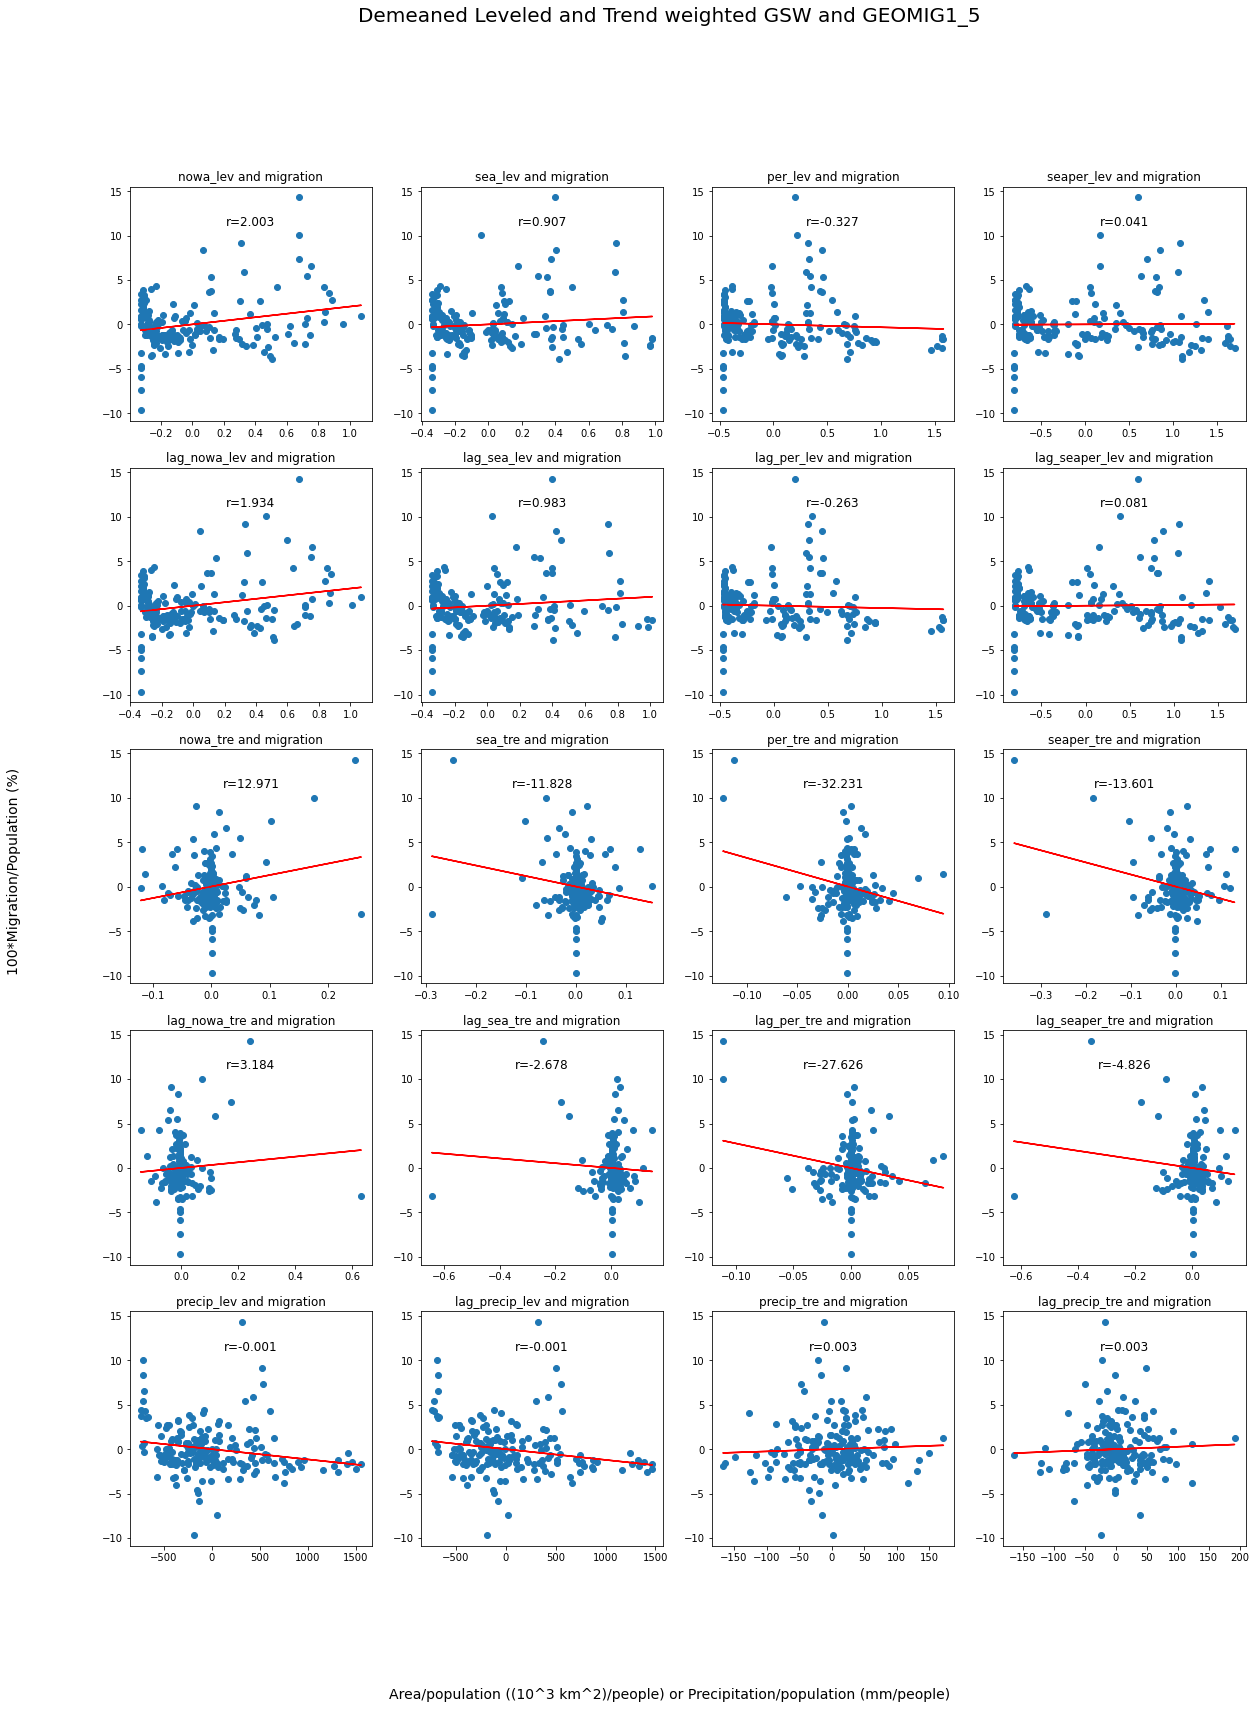

In [376]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5,4,figsize=(20,25))
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20]
plotdemean(demean_wt.columns[2:22],axs,'mig_wt')
plt.suptitle("Demeaned Leveled and Trend weighted GSW and GEOMIG1_5", fontsize=20)
fig.text(0.5, 0.04,'Area/population ((10^3 km^2)/people) or Precipitation/population (mm/people)', ha='center',fontsize=14)
fig.text(0.04, 0.5,'100*Migration/Population (%)', va='center', rotation='vertical',fontsize=14);

### FE estimator

In [377]:
def calcr(cols,dep):
    r = []
    for col in cols:
        cond = demean[col].notna() #create a boolean to mask nan
        y = demean[dep][cond] #drop an element where cl is nan
        x = demean[col].dropna()
        m,b = np.polyfit(x,y,1)
        r.append(m)
    return r

In [378]:
r_unwt = calcr(demean.columns[2:22],'mig')
r_wt = calcr(demean_wt.columns[2:22],'mig_wt')

In [379]:
cols_unwt = demean.columns[2:22].tolist()
cols_wt = demean_wt.columns[2:22].tolist()

In [380]:
dict1 = dict(zip(cols1,r_GSW_unwt))
dict2 = dict(zip(cols2,r_Precip_unwt))
dict3 = dict(zip(cols3,r_GSW_wt))
dict4 = dict(zip(cols4,r_Precip_wt))

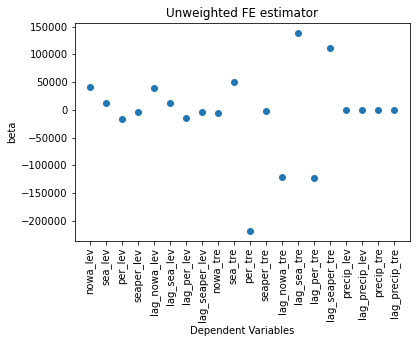

In [381]:
plt.scatter(cols_unwt,r_unwt)
plt.xticks(rotation=90)
plt.xlabel('Dependent Variables')
plt.ylabel('beta')
plt.title('Unweighted FE estimator');

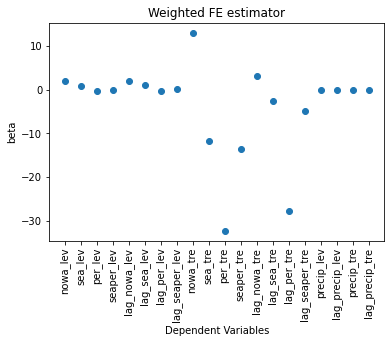

In [382]:
plt.scatter(cols_wt,r_wt)
plt.xticks(rotation=90)
plt.xlabel('Dependent Variables')
plt.ylabel('beta')
plt.title('Weighted FE estimator');

## Significance Test (p-value)

I will use sample size of 100. (n=100)
1. Set null and alternative hypotheses. 
2. Calculate test statistics (n=100)
3. Consider decision rule (significant level=5%)
4. State rejection decision
5. Conclusion

In [383]:
demean.head()

,year,code,nowa_lev,sea_lev,per_lev,seaper_lev,lag_nowa_lev,lag_sea_lev,lag_per_lev,lag_seaper_lev,...,lag_sea_tre,lag_per_tre,lag_seaper_tre,precip_lev,lag_precip_lev,precip_tre,lag_precip_tre,mig,mig_wt,pop
state,,,,,,,,,,,,,,,,,,,,,
AGUASCALIENTES,-12.5,-15.5,-0.296156,-0.335569,-0.456739,-0.792308,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-442.705122,-465.646649,18.901830,-21.568884,25160.0,2.757330,-2.431497e+06
AGUASCALIENTES,-7.5,-15.5,-0.307813,-0.324340,-0.453774,-0.778114,-0.310701,-0.325827,-0.455625,-0.781452,...,0.006398,0.001498,0.007896,-351.971788,-341.996649,-60.326741,-19.598884,33408.0,3.133633,-2.288436e+06
AGUASCALIENTES,-2.5,-15.5,-0.305813,-0.320849,-0.457287,-0.778136,-0.311942,-0.319396,-0.458340,-0.777736,...,0.003080,-0.001107,0.001972,-527.688455,-502.996649,-20.952455,-37.861741,21278.0,1.514575,-2.206871e+06
AGUASCALIENTES,2.5,-15.5,-0.308435,-0.320458,-0.455137,-0.775596,-0.310830,-0.319972,-0.458959,-0.778930,...,0.004445,0.002107,0.006552,-365.338455,-380.029983,29.416116,70.521116,21560.0,1.284852,-2.085740e+06
AGUASCALIENTES,7.5,-15.5,-0.314621,-0.317386,-0.451937,-0.769324,-0.320085,-0.316393,-0.453241,-0.769634,...,0.005030,-0.000183,0.004846,-349.771788,-293.763316,-29.869598,-38.473170,20168.0,0.963176,-1.966160e+06


In [384]:
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import dmatrices

In [406]:
demean.columns[2:-3]

Index(['nowa_lev', 'sea_lev', 'per_lev', 'seaper_lev', 'lag_nowa_lev',
       'lag_sea_lev', 'lag_per_lev', 'lag_seaper_lev', 'nowa_tre', 'sea_tre',
       'per_tre', 'seaper_tre', 'lag_nowa_tre', 'lag_sea_tre', 'lag_per_tre',
       'lag_seaper_tre', 'precip_lev', 'lag_precip_lev', 'precip_tre',
       'lag_precip_tre'],
      dtype='object')

In [452]:
pval_unwt = []
rsq_unwt = []
for col in demean.columns[2:-3]:
    cond1 = demean[col].notna() #create a boolean to mask nan
    y = demean['mig'][cond1] #drop an element where cl is nan
    x = demean[col].dropna()
    mod = sm.OLS(y, x)
    res = mod.fit()
    pval_unwt.append(res.pvalues)
    rsq_unwt.append(res.rsquared)

In [453]:
rsq_unwt

[0.015503682815443232,
 0.0011512220888199032,
 0.004590597032100074,
 0.0008830563558892557,
 0.014751358716535434,
 0.001153091253090155,
 0.004055669606607193,
 0.0007505501372430112,
 4.6170155253433265e-06,
 0.0003105786639511221,
 0.0014185432408436727,
 4.0681185553559374e-07,
 0.004735720946965838,
 0.0061543928329389486,
 0.00048047281555796406,
 0.004536003411210077,
 0.02484324799656723,
 0.026049338062580918,
 0.00016469028498400373,
 0.00018387168216948968]

In [450]:
pval_wt = []
rsq_wt = []
for col in demean.columns[2:-3]:
    cond1 = demean_wt[col].notna() #create a boolean to mask nan
    y = demean_wt['mig'][cond1] #drop an element where cl is nan
    x = demean_wt[col].dropna()
    mod = sm.OLS(y, x)
    res = mod.fit()
    pval_wt.append(res.pvalues)
    rsq_wt.append(res.rsquared)

In [454]:
rsq_wt

[0.9324247429556899,
 0.7627280009003458,
 0.059989569731589976,
 0.20178266520136634,
 0.9323782152805487,
 0.6694162417926302,
 0.0882762740066182,
 0.0824025606246952,
 0.4490501770284444,
 0.6856463672574926,
 0.039800339808762186,
 0.6061094981379733,
 0.7423800668471741,
 0.8116582510321536,
 0.5660830702932482,
 0.666878564308115,
 0.9370402603770608,
 0.936514580999085,
 0.43518973530906035,
 0.9346744186936905]

In [431]:
rsq_wt

[nowa_lev    2.948591e-107
 dtype: float64,
 sea_lev    4.017544e-58
 dtype: float64,
 per_lev    0.000861
 dtype: float64,
 seaper_lev    2.009940e-10
 dtype: float64,
 lag_nowa_lev    1.209735e-106
 dtype: float64,
 lag_sea_lev    6.863999e-45
 dtype: float64,
 lag_per_lev    0.000049
 dtype: float64,
 lag_seaper_lev    0.000089
 dtype: float64,
 nowa_tre    6.617772e-24
 dtype: float64,
 sea_tre    7.850436e-45
 dtype: float64,
 per_tre    0.008501
 dtype: float64,
 seaper_tre    1.979342e-36
 dtype: float64,
 lag_nowa_tre    1.828668e-50
 dtype: float64,
 lag_sea_tre    1.047964e-61
 dtype: float64,
 lag_per_tre    1.000398e-31
 dtype: float64,
 lag_seaper_tre    3.118458e-41
 dtype: float64,
 precip_lev    1.217121e-116
 dtype: float64,
 lag_precip_lev    2.693465e-116
 dtype: float64,
 precip_tre    1.759295e-25
 dtype: float64,
 lag_precip_tre    4.128774e-115
 dtype: float64]

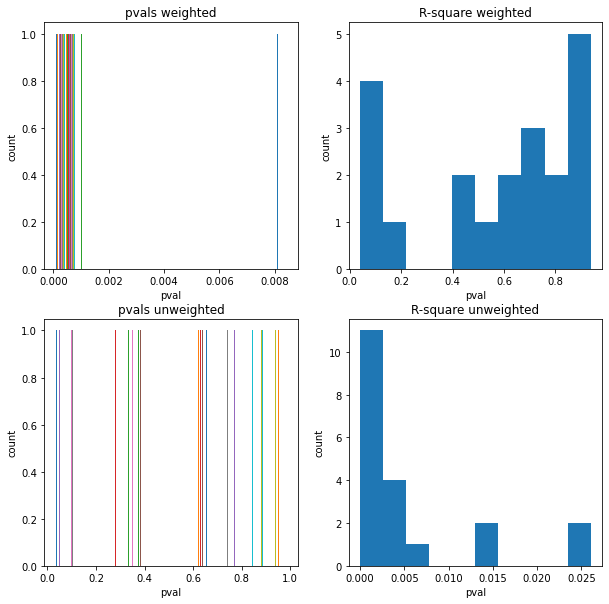

In [458]:
##  per_tre    0.008501


fig,ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(pval_wt)
ax[0,0].set_title('pvals weighted')
ax[0,0].set_xlabel('pval')
ax[0,0].set_ylabel('count')

ax[1,0].hist(pval_unwt)
ax[1,0].set_title('pvals unweighted')
ax[1,0].set_xlabel('pval')
ax[1,0].set_ylabel('count')

ax[0,1].hist(rsq_wt)
ax[0,1].set_title('R-square weighted')
ax[0,1].set_xlabel('pval')
ax[0,1].set_ylabel('count')

ax[1,1].hist(rsq_unwt)
ax[1,1].set_title('R-square unweighted')
ax[1,1].set_xlabel('pval')
ax[1,1].set_ylabel('count');

In [393]:
cond1 = demean['per_tre'].notna() #create a boolean to mask nan
y = demean['mig'][cond1] #drop an element where cl is nan
x = demean['per_tre'].dropna()
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mig   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.2429
Date:                Wed, 24 Feb 2021   Prob (F-statistic):                       0.623
Time:                        16:23:15   Log-Likelihood:                         -2255.2
No. Observations:                 172   AIC:                                      4512.
Df Residuals:                     171   BIC:                                      4516.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [394]:
cond1 = demean['seaper_tre'].notna() #create a boolean to mask nan
y = demean['mig'][cond1] #drop an element where cl is nan
x = demean['seaper_tre'].dropna()
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mig   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                          6.956e-05
Date:                Wed, 24 Feb 2021   Prob (F-statistic):                       0.993
Time:                        16:23:59   Log-Likelihood:                         -2255.3
No. Observations:                 172   AIC:                                      4513.
Df Residuals:                     171   BIC:                                      4516.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [395]:
cond1 = demean['lag_nowa_tre'].notna() #create a boolean to mask nan
y = demean['mig'][cond1] #drop an element where cl is nan
x = demean['lag_nowa_tre'].dropna()
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mig   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.7851
Date:                Wed, 24 Feb 2021   Prob (F-statistic):                       0.377
Time:                        16:24:41   Log-Likelihood:                         -2169.8
No. Observations:                 166   AIC:                                      4342.
Df Residuals:                     165   BIC:                                      4345.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [409]:
cond1 = demean['precip_lev'].notna() #create a boolean to mask nan
y = demean['mig'][cond1] #drop an element where cl is nan
x = demean['precip_lev'].dropna()
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mig   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              4.866
Date:                Wed, 24 Feb 2021   Prob (F-statistic):                      0.0286
Time:                        17:04:23   Log-Likelihood:                         -2505.3
No. Observations:                 192   AIC:                                      5013.
Df Residuals:                     191   BIC:                                      5016.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [410]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia